In [1]:
from numpy import mean
from sklearn import svm
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# ! pip install tqdm
# from tqdm import tqdm
import joblib
# import os

In [3]:
from sklearn.model_selection import train_test_split
from DataPreparation import DataPreparation

In [4]:
pics = './images'

In [5]:
df = pd.read_csv('./data/balanced_dataframe.csv', index_col=None)
df.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,label
0,10.337455,10.337455,0.057778,-1.272753,0.255933,23.375000,505.329,484.161,504.075680,168,...,0,0,0,0,0,0,0,0,0,1
1,10.335047,10.335047,0.059736,-1.271941,0.255933,23.375000,505.329,484.161,504.075680,168,...,0,0,0,0,0,0,0,0,0,1
2,10.333078,10.333078,0.061184,-1.271281,0.255933,23.375000,505.329,484.161,504.075680,168,...,0,0,0,0,0,0,0,0,0,1
3,10.355554,10.355554,0.205346,-1.235039,0.369988,25.218750,440.504,412.280,440.217203,170,...,0,0,0,0,0,0,0,0,0,1
4,6.090409,6.090409,0.226017,0.226017,0.547921,12.285714,362.614,353.542,360.961752,104,...,0,0,0,0,0,0,0,0,0,1


In [6]:
X = df.drop(columns=['label'])
y = df['label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y
                                                    )
y_test.value_counts()

label
0    915
1    915
Name: count, dtype: int64

In [8]:
data_preparation = DataPreparation(X_train, X_test, y_train, y_test)

# # get scaled clean data
# # use StandartScaler
X_train, X_test, y_train, y_test = data_preparation.clean_dataset()

Index(['MaxAbsEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed',
       'SPS', 'MolWt', 'MaxPartialCharge', 'MinPartialCharge',
       'FpDensityMorgan1', 'BCUT2D_MWHI',
       ...
       'fr_pyridine', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone',
       'fr_term_acetylene', 'fr_tetrazole', 'fr_thiazole', 'fr_thiophene',
       'fr_unbrch_alkane', 'fr_urea'],
      dtype='object', length=122)


In [9]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,0.541551,0.124870,0.641624,-0.666564,-0.429219,1.197503,-0.792033,-0.412233,-1.218143,-0.594005,...,-0.367976,-0.295040,-0.321351,-0.123555,-0.085675,-0.116384,-0.206108,-0.234864,-0.195219,-0.335506
1,0.408504,1.222551,0.536141,-0.576493,-0.935691,-0.400728,0.770033,-0.471668,0.207349,0.305352,...,-0.367976,2.994308,-0.321351,-0.123555,-0.085675,-0.116384,-0.206108,-0.234864,-0.195219,-0.335506
2,-2.479417,0.954479,0.954999,0.223060,-0.859168,-1.452391,-0.888316,-0.449814,0.257172,0.496200,...,-0.367976,-0.295040,-0.321351,-0.123555,-0.085675,-0.116384,-0.206108,-0.234864,-0.195219,-0.335506
3,-0.608709,0.122280,-0.172793,-1.398388,0.930689,0.682514,-1.123605,0.422408,-0.228602,-0.589122,...,-0.367976,-0.295040,-0.321351,-0.123555,-0.085675,-0.116384,-0.206108,-0.234864,18.912780,-0.335506
4,0.430799,0.102557,0.374488,-0.479276,-0.687093,0.297817,0.726927,-0.449814,-0.411421,-0.581436,...,-0.367976,-0.295040,-0.321351,-0.123555,-0.085675,-0.116384,-0.206108,-0.234864,-0.195219,2.826988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,0.757622,0.270277,-2.003799,0.623808,1.122599,0.485094,-0.156729,0.857224,0.473072,0.309193,...,-0.367976,-0.295040,2.811455,-0.123555,-0.085675,-0.116384,-0.206108,-0.234864,-0.195219,-0.335506
4266,-2.427091,0.707716,0.931286,-0.278015,0.076000,0.365198,-0.326619,-0.449803,0.633256,-0.595037,...,-0.367976,-0.295040,-0.321351,-0.123555,-0.085675,-0.116384,-0.206108,-0.234864,-0.195219,-0.335506
4267,-0.078126,-0.438274,-1.387465,2.106736,0.801855,-1.266539,-1.245481,0.737894,2.029823,0.496200,...,-0.367976,-0.295040,-0.321351,7.103557,-0.085675,-0.116384,-0.206108,-0.234864,-0.195219,-0.335506
4268,-0.434304,-0.277354,0.371256,-1.326402,-0.368717,0.258718,1.544812,-0.909945,-0.202486,-0.585351,...,2.174512,-0.295040,-0.321351,-0.123555,-0.085675,-0.116384,-0.206108,-0.234864,-0.195219,-0.335506


In [10]:
X_train[[0, 1]].set_axis(['one', 'two'], axis=1)

,one,two
0,0.541551,0.124870
1,0.408504,1.222551
2,-2.479417,0.954479
3,-0.608709,0.122280
4,0.430799,0.102557
...,...,...
4265,0.757622,0.270277
4266,-2.427091,0.707716
4267,-0.078126,-0.438274
4268,-0.434304,-0.277354


In [11]:
from numpy import mean
from sklearn import svm
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200)
scoring_lr = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}
param_grid_lr = {'C': [0.01, 0.1, 10, 100],
              'penalty': ['l1', 'l2', 'none'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

cv_lr = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
grid_lr = GridSearchCV(lr, 
                    param_grid_lr, 
                    cv=cv_lr, 
                    scoring=scoring_lr, 
                    refit='AUC', 
                    verbose=1, 
                    n_jobs=-1,
                    # error_score='raise'
                    )

%time grid_lr.fit(X_train, y_train)

print()
print(grid_lr.best_params_)

y_pred = grid_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)

score = roc_auc_score(y_test, y_pred)
print("Mean ROC AUC:", score)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated i

CPU times: user 1.5 s, sys: 130 ms, total: 1.63 s
Wall time: 1min 26s

{'C': 100, 'penalty': 'none', 'solver': 'sag'}
Accuracy: 0.946448087431694
Mean ROC AUC: 0.9464480874316941


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [13]:
y_pred = grid_lr.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
cm = confusion_matrix(y_train, y_pred)
print("Accuracy:", accuracy)

score = roc_auc_score(y_train, y_pred)
print("Mean ROC AUC:", score)

Accuracy: 0.9557377049180328
Mean ROC AUC: 0.9557377049180328


In [14]:
dir(grid_lr)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 '

In [15]:
clf = grid_lr.best_estimator_

In [16]:
type(clf)

sklearn.linear_model._logistic.LogisticRegression

In [17]:
importance

NameError: name 'importance' is not defined

In [ ]:
len(X.columns)

210

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (210,) and arg 1 with shape (1, 122).

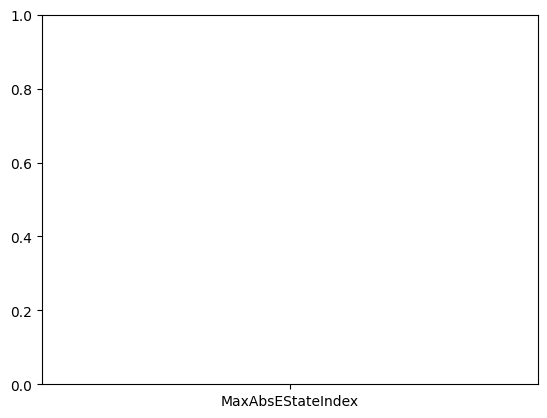

In [ ]:
# ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
importance = np.abs(clf.coef_)
feature_names = X.columns
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()